In [81]:
import pandas as pd

cycling = pd.read_csv("../datasets/bike_rides.csv", index_col=0,
                      parse_dates=True)
cycling.index.name = ""
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]
data.head()

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000


In [3]:
np.arctan(data['slope'])


2020-08-18 14:43:19   -0.033857
2020-08-18 14:43:20   -0.033559
2020-08-18 14:43:21   -0.033210
2020-08-18 14:43:22   -0.032896
2020-08-18 14:43:23    0.000000
                         ...   
2020-09-13 14:55:57    0.000000
2020-09-13 14:55:58    0.000000
2020-09-13 14:55:59    0.000000
2020-09-13 14:56:00    0.000000
2020-09-13 14:56:01    0.000000
Name: slope, Length: 38254, dtype: float64

In [82]:
import numpy as np
alpha = np.arctan(data['slope'])

data['speed^3'] = data['speed']**3
data['slope_speed'] = data['speed']*alpha
data['speed x acc'] = data['speed']*data['acceleration']


In [83]:
data.head()

,heart-rate,cadence,speed,acceleration,slope,speed^3,slope_speed,speed x acc
,,,,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870,80.901828,-0.146430,0.380600
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571,81.520685,-0.145510,0.365091
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223,85.707790,-0.146425,0.103171
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908,87.824421,-0.146224,0.007112
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000,87.587538,0.000000,0.508050


In [15]:
predicting_columns = ['speed^3','speed', 'slope_speed', 'speed x acc']
predictors = data[predicting_columns]
predictors.head()

,speed^3,speed,slope_speed,speed x acc
,,,,
2020-08-18 14:43:19,80.901828,4.325,-0.146430,0.380600
2020-08-18 14:43:20,81.520685,4.336,-0.145510,0.365091
2020-08-18 14:43:21,85.707790,4.409,-0.146425,0.103171
2020-08-18 14:43:22,87.824421,4.445,-0.146224,0.007112
2020-08-18 14:43:23,87.587538,4.441,0.000000,0.508050


In [16]:
predictors['slope_speed'].mean()

-0.002674764691505746

using the new data matrix, create a linear predictive model based on a sklearn.preprocessing.StandardScaler and a sklearn.linear_model.RidgeCV;
use a sklearn.model_selection.ShuffleSplit cross-validation strategy with only 4 splits (n_splits=4) to evaluate the statistical performance of the model. Use the mean absolute error (MAE) as a statistical performance metric. Also, pass the parameter return_estimator=True and return_train_score=True to answer the subsequent questions. Be aware that the ShuffleSplit strategy is a naive strategy and we will investigate the consequence of making this choice in the subsequent questions.

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

cv = ShuffleSplit(n_splits=4)

linear = make_pipeline(StandardScaler(), RidgeCV())

cv_results = cross_validate(linear, predictors, target, cv=cv
                           ,scoring='neg_mean_absolute_error',
                           return_estimator=True, return_train_score=True) 

In [18]:
cv_results

{'fit_time': array([0.01322651, 0.0121541 , 0.01210475, 0.01207995]),
 'score_time': array([0.0015738 , 0.0015893 , 0.00162268, 0.00156808]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])],
 'test_score': array([-71.38908512, -72.66285757, -72.05181126, -72.1698144 ]),
 'train_score': array([-72.46483947, -72.30883841, -72.4268739 , -72.38699411])}

In [23]:
cv_results = cross_validate(model, predictors, target, cv=cv
                           ,scoring='r2',
                           return_estimator=True, return_train_score=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=predicting_columns)

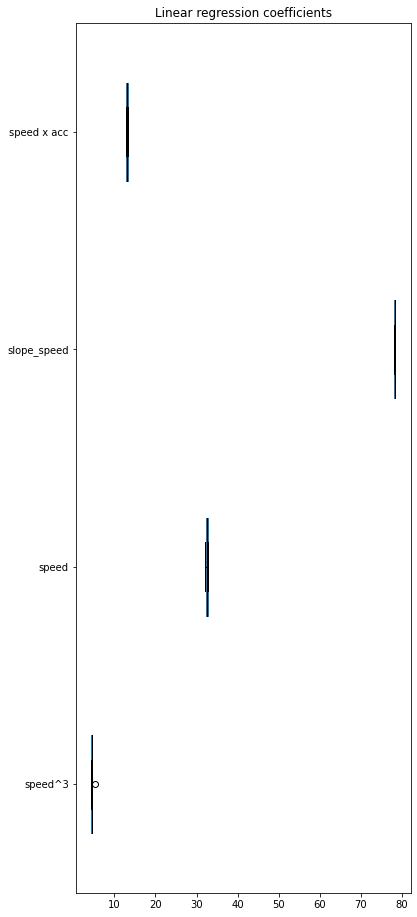

In [24]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

In [25]:
predicting_columns = ['cadence','heart-rate','speed^3','speed', 'slope_speed', 'speed x acc']
predictors = data[predicting_columns]
predictors.head()

,cadence,heart-rate
,,
2020-08-18 14:43:19,64.0,102.0
2020-08-18 14:43:20,64.0,103.0
2020-08-18 14:43:21,66.0,105.0
2020-08-18 14:43:22,66.0,106.0
2020-08-18 14:43:23,67.0,106.0


Now, we will create a predictive model that uses all available sensor measurements such as cadence (the speed at which a cyclist turns pedals measured in rotation per minute) and heart-rate (the number of beat per minute of the heart of the cyclist while exercising). Also, we will use a non-linear regressor, a sklearn.ensemble.HistGradientBoostingRegressor.

Fix the number of maximum iterations to 1000 (max_iter=1_000) and activate the early stopping (early_stopping=True). Repeat the previous evaluation using this regressor.

In [84]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

cv = ShuffleSplit(n_splits=4,random_state=0)

hgbdt = make_pipeline(StandardScaler(),
                      HistGradientBoostingRegressor(max_iter=1000,
                                                   early_stopping=True,
                                                   random_state=42))

cv = ShuffleSplit(n_splits=4, random_state=0)
cv_results_hgbdt = cross_validate(
    hgbdt, data, target, cv=cv, scoring="neg_mean_absolute_error",
    return_estimator=True, return_train_score=True, n_jobs=2)

In [51]:
cv_results_hgbdt

{'fit_time': array([0.77680945, 1.09958434, 0.50835347, 1.60926318]),
 'score_time': array([0.01865935, 0.02433395, 0.01191258, 0.02914691]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                                 max_iter=1000,
                                                 random_state=42))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                                 max_iter=1000,
                                                 random_state=42))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                           

In [48]:
print(f"MAE on test sets:\n {errors}\n",
      f"mean +/- std: {cv_results_hgbdt['test_score'].mean():.3f} +/- {cv_results_hgbdt['test_score'].std():.3f} Watts")

MAE on test sets:
 [44.57659309 44.00906176 44.09643521 43.21122957]
 mean +/- std: -43.974 +/- 0.490 Watts


In [85]:
import collections
collections.Counter(data.index.date)

Counter({datetime.date(2020, 8, 18): 10222,
         datetime.date(2020, 8, 20): 10055,
         datetime.date(2020, 8, 26): 10324,
         datetime.date(2020, 9, 13): 7653})

In [86]:
#or
import numpy as np

unique_ride_dates = np.unique(cycling.index.date)
print(f"There are {len(unique_ride_dates)} bike rides")

There are 4 bike rides


# 7
Instead of using the naive ShuffleSplit strategy, we will use a strategy that takes into account the group defined by each individual date. It corresponds to a bike ride. We would like to have a cross-validation strategy that evaluates the capacity of our model to predict on a completely new bike ride: the samples in the validation set should only come from rides not present in the training set. Therefore, we can use a LeaveOneGroupOut strategy: at each iteration of the cross-validation, we will keep a bike ride for the evaluation and use all other bike rides to train our model.

Thus, you concretely need to:

create a variable called group that is a 1D numpy array containing the index of each ride present in the dataframe. Therefore, the length of group will be equal to the number of samples in data. If we had 2 bike rides, we would expect the indices 0 and 1 in group to differentiate the bike ride. You can use pd.factorize to encode any Python types into integer indices.
create a cross-validation object named cv using the sklearn.model_selection.LeaveOneGroupOut strategy.
evaluate both the linear and histogram gradient boosting models with this strategy.

In [92]:
np.unique(cycling.index.date)

array([datetime.date(2020, 8, 18), datetime.date(2020, 8, 20),
       datetime.date(2020, 8, 26), datetime.date(2020, 9, 13)],
      dtype=object)

In [94]:
from sklearn.model_selection import LeaveOneGroupOut

group = cycling.index.date

cv = LeaveOneGroupOut()

cv_results_hgbdt = cross_validate(
    hgbdt, data, target, cv=cv, scoring="neg_mean_absolute_error",
    return_estimator=True, return_train_score=True, n_jobs=2, groups=group)

cv_results_hgbdt

{'fit_time': array([0.60675597, 0.67476559, 0.63793993, 0.90545273]),
 'score_time': array([0.03251314, 0.035707  , 0.03538847, 0.03735185]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                                 max_iter=1000,
                                                 random_state=42))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                                 max_iter=1000,
                                                 random_state=42))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('histgradientboostingregressor',
                   HistGradientBoostingRegressor(early_stopping=True,
                                           

In [95]:
cv_results_linear = cross_validate(
    linear, data, target, cv=cv, scoring="neg_mean_absolute_error",
    return_estimator=True, return_train_score=True, n_jobs=2, groups=group)

cv_results_linear

{'fit_time': array([0.01749921, 0.0169158 , 0.01644635, 0.01690722]),
 'score_time': array([0.00214839, 0.00196505, 0.00217175, 0.00193715]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])],
 'test_score': array([-60.65286273, -62.1844413 , -69.18456794, -52.88364123]),
 'train_score': array([-61.6143872 , -61.47311661, -58.24992435, -63.74164377])}

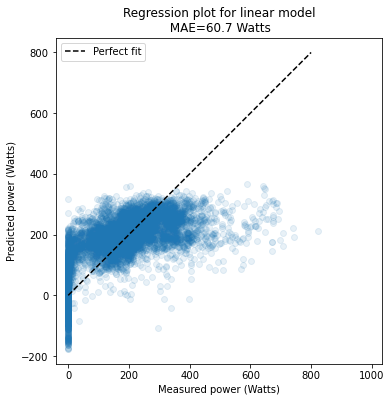

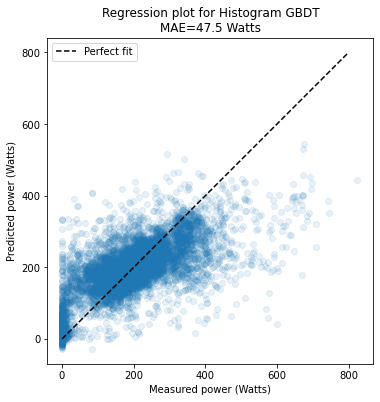

In [99]:
#10
from sklearn.metrics import mean_absolute_error

groups = cycling.index.date

# extract the dataset
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=groups))[0]

data_linear_model_train = data.iloc[train_indices]
data_linear_model_test = data.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

# fit models and collect predictions
linear.fit(data_linear_model_train, target_train)
target_predicted_linear_model = linear.predict(data_linear_model_test)

hgbdt.fit(data_train, target_train)
target_predicted_hgbdt = hgbdt.predict(data_test)

# compute errors
mae_linear_model = mean_absolute_error(target_test,
                                       target_predicted_linear_model)
mae_hgbdt = mean_absolute_error(target_test, target_predicted_hgbdt)

# make regression plots
plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predicted_linear_model, alpha=0.1)
plt.plot([0, 800], [0, 800], color="black", linestyle="--",
         label="Perfect fit")
plt.legend()
plt.axis("square")
plt.xlabel("Measured power (Watts)")
plt.ylabel("Predicted power (Watts)")
_ = plt.title(f"Regression plot for linear model\n "
              f"MAE={mae_linear_model:.1f} Watts")

plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predicted_hgbdt, alpha=0.1)
plt.plot([0, 800], [0, 800], color="black", linestyle="--",
         label="Perfect fit")
plt.legend()
plt.axis("square")
plt.xlabel("Measured power (Watts)")
plt.ylabel("Predicted power (Watts)")
_ = plt.title(f"Regression plot for Histogram GBDT\n"
              f"MAE={mae_hgbdt:.1f} Watts")

Text(0, 0.5, 'Elevation (m)')

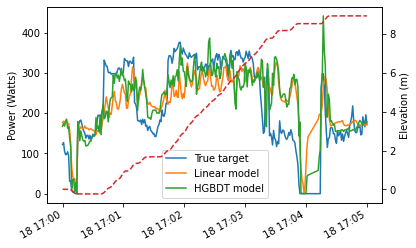

In [100]:
# extract the data and make the prediction
time_slice = slice("2020-08-18 17:00:00", "2020-08-18 17:05:00")

data_test_linear_model_subset = data_linear_model_test[time_slice]
data_test_subset = data_test[time_slice]
target_test_subset = target_test[time_slice]

target_predicted_linear_model = linear.predict(
    data_test_linear_model_subset)
target_predicted_hgbdt = hgbdt.predict(data_test_subset)

# make the plot
ax = target_test_subset.plot(label="True target")
ax.plot(target_test_subset.index, target_predicted_linear_model,
        label="Linear model")
ax.plot(target_test_subset.index, target_predicted_hgbdt, label="HGBDT model")
ax.set_ylabel("Power (Watts)")
plt.legend()

# In addition, we add the elevation to show that the data were acquired in a
# hill. This part of the answer was optional.
ax_elevation = ax.twinx()
ax_elevation.plot(target_test_subset.index, data_test_subset["slope"].cumsum(),
                  color="tab:red", linestyle="--")
ax_elevation.set_ylabel("Elevation (m)")
